# Introduction to regression models

Import relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


## Load data

In [ ]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [ ]:
wine_df.head()

## Exploratory data analysis

Explore the dataset. Visualize the data and try to understand what is the number of observations, where are the features and which is the target.

In [ ]:
wine_df.info(), wine_df.describe()

## Create your own linear model

Get 100 samples with random state (seed) = 1

In [ ]:
sampled_data = wine_df.sample(n=100, random_state=1) #tire aléatoirement 100 données / 1 pour que les résultats soient reproductibles
sampled_data_df = pd.DataFrame(sampled_data)
sampled_data_df.head(), sampled_data_df.shape

Plot pH in function of fixed acidity

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=sampled_data_df, x='fixed acidity', y='pH')
plt.title('pH in function of fixed acidity')
plt.xlabel('Fixed acidity')
plt.ylabel('pH')
plt.show()

What can you say about pH and fixed acidity? are they correlated ? 

Plus l'acidité fixe augmente et plus le pH diminue, on voit donc une corrélation.

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and a slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

In [ ]:
# Define intercept and slope
intercept = 4
slope = -0.05

sampled_data_df['predicted_pH'] = slope * sampled_data_df['fixed acidity'] + intercept

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_data_df, x='fixed acidity', y='pH', label='Actual pH')
plt.plot(sampled_data_df['fixed acidity'], sampled_data_df['predicted_pH'], color='red', label='Predicted pH')
plt.title('pH in function of fixed acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.legend()
plt.grid(True)
plt.show()

what is the best linear model you can find ? try to find the optimal intercept and slope by your own

Hint: create your own algorithm to find the best intercept and slope

Help: if you lack of inspiration, you can try to implement the following algorithm:

1) choose a random $b_1$ and fix it. Then calculate the best $b-0$ that minimize the error of the prediction
- define X (fixed acidity) and y (pH)
- define a $b_1$ fixed
- define a range of $b_0$ to test
- define a function predict(x,b0,b1) that returns the predictions (y_pred)
- define a function calculate_error(y, y_pred) that estimate the sum of squared errors $e = \Sigma_i^{100}|y_i - y_{pred_i}|^2$
- for each $b_0$, find the $b_0 min$ that minimize $e$

2) fix $b_0$ with the $b_0 min$ you find before. Then, calculate the best $b_1 min$ that minimizes the error by following the same steps as before

3) fix $b_1$ with the new $b_1 min$ you found. Then, calculate a new $b_0 min$ that minimizes the error by following the same steps

4) reiterate on 2

In [ ]:
X = sampled_data_df['fixed acidity']
y = sampled_data_df['pH']

def predict(x, b0, b1):
    return b1 * x + b0

def calculate_error(y, y_pred):
    return np.sum((y - y_pred) ** 2)

b0 = 4.0
b1 = -0.05
tolerance = 1e-6
max_iterations = 100
prev_error = float('inf')

for _ in range(max_iterations):
    b0_range = np.linspace(b0 - 0.5, b0 + 0.5, 100) # Crée un tableau de 100 valeurs allant de 3.5 à 4.5
    errors = [calculate_error(y, predict(X, i, b1)) for i in b0_range]
    b0 = b0_range[np.argmin(errors)] # trouve la valeur minimale grâce à l'indice de la valeur minimale dans le tableau errors
    current_error = np.min(errors) # retourne la plus petite valeur avec les différentes valeurs de b0 testées

    b1_range = np.linspace(b1 - 0.05, b1 + 0.05, 100)
    errors = [calculate_error(y, predict(X, b0, j)) for j in b1_range]
    b1 = b1_range[np.argmin(errors)]
    current_error = np.min(errors)

    if abs(prev_error - current_error) < tolerance:
        break
    prev_error = current_error

print("Optimal b0:", b0)
print("Optimal b1:", b1)
print("Minimum error:", current_error)

Compare to seaborn regplot

In [ ]:
sns.regplot(y='pH', x='fixed acidity', data=sampled_data_df)

In [ ]:
# plot your linear model with regplot and compare
sns.regplot(x=X, y=y)
plt.show()

How far is your linear model from seaborn model?

In [ ]:
X = sampled_data_df['fixed acidity']
y = sampled_data_df['pH']

slope, intercept = np.polyfit(X, y, 1)
print("Seaborn model slope:", slope)
print("Seaborn model intercept:", intercept)

In [ ]:
slope_model = b1
intercept_model = b0

print("Difference in slopes:", abs(slope - slope_model))
print("Difference in intercepts:", abs(intercept - intercept_model))

How do you evaluate the performance of your linear models at each iteration ?

In [ ]:
# On optimise la valeur prédite grâce à l'erreur

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

In [ ]:
# 100 iterations / Optimal intercept: 3.686868686868687 Optimal slope: -0.04797979797979797
# Difference in slopes: 0.003621206747893485
# Difference in intercepts: 0.030786776898195978

According to you ... is this the OLS method ? can you describe with your own words, how it works? how different is from your method ?

Compare with the Linear regression used in scikit learn

In [ ]:
# Instanciate the model
model = LinearRegression()

# Define X and y
X = sampled_data_df[['fixed acidity']]
y = sampled_data_df['pH']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)

Are you close to these values ?

In [ ]:
# Yes

How do you interpret these values? What do they say about the pH and fixed acidity?

In [ ]:
# Plus l'acidité augmente et plus le pH diminue

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

In [ ]:
new_sampled_data = wine_df.sample(n=100, random_state=60)
new_sampled_data_df = pd.DataFrame(new_sampled_data)
new_sampled_data_df.head()

Try to plot a regplot with the sckitlearn coefficients, your best coefficient calculated before. Does your best linear model (sklearn) fit with this new sample set ?  Why ?

Hint: read about what is overfit?

In [ ]:
X_original = sampled_data[['fixed acidity']]
y_original = sampled_data['pH']
model = LinearRegression()
model.fit(X_original, y_original)

new_sample = wine_df.sample(n=100, random_state=60)
X_new = new_sample[['fixed acidity']]
y_new = new_sample['pH']

sns.regplot(x=X_new['fixed acidity'], y=y_new, scatter=True, label='Actual Data', color='blue')

predicted_y_new = model.predict(X_new)
plt.scatter(X_new['fixed acidity'], predicted_y_new, color='red', label='Model Predictions')

plt.title('Comparison of model predictions and actual data on new sample data')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.legend()
plt.show()

How can you solve the problem ?

In [ ]:
# augmenter la taille de l'ensemble des données

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

In [ ]:
train_sample = wine_df.sample(n=100, random_state=42)
sns.regplot(x='pH', y='quality', data=train_sample, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Lien entre pH et la qualité')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.show()

In [ ]:
X_train = train_sample[['pH']]
y_train = train_sample['quality']

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

In [ ]:
test_sample = wine_df.sample(n=100, random_state=60)
X_test = test_sample[['pH']]
y_test = test_sample['quality']

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(X_test['pH'], y_test, alpha=0.5, label='Actual Quality')
plt.scatter(X_test['pH'], y_pred, color='red', label='Predicted Quality')
plt.title('Modèle testé sur le new sample')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne sur test sample", mse)

How good is this model performing? What is the error? is it low or high ?

In [ ]:
# Modèle correct sans être exceptionnel

### Using Holdout method 

Let's use the train split method to divide the dataset in 70% train set and 30% test set. This time we will use another feature. Let's try with fixed acidity this time

In [ ]:
# Choose your feature and your target
X = test_sample[['fixed acidity']]
y = test_sample['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

Is this score good or bad? What does it means? 

Try to use regplot to compare with your new model and understand graphically what is happening for the train and test set. you should try two graphics: (one using the X_train,y_train and another one using X_test, y_test)


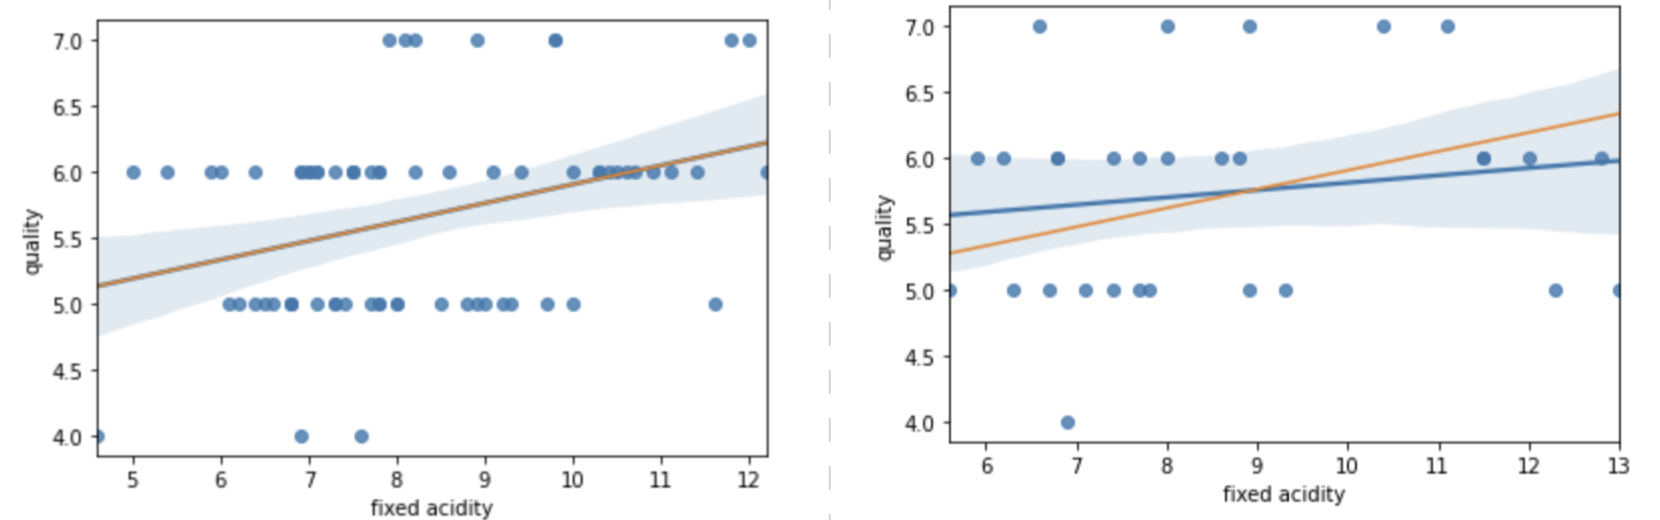

In [ ]:
# le score est mauvais, car dans le négatif

In [ ]:
plt.figure(figsize=(8, 4))
sns.regplot(x=X_train['fixed acidity'], y=y_train, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.plot(X_train['fixed acidity'], model.predict(X_train), color='yellow', linewidth=2)
plt.title('Régression Linéaire sur l\'ensemble de train')
plt.xlabel('fixed acidity')
plt.ylabel('Quality')
plt.show()

plt.figure(figsize=(8, 4))
sns.regplot(x=X_test['fixed acidity'], y=y_test, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.plot(X_test['fixed acidity'], model.predict(X_test), color='yellow', linewidth=2)
plt.title('Régression Linéaire sur l\'ensemble de test')
plt.xlabel('fixed acidity')
plt.ylabel('Quality')
plt.show()

In [ ]:
sns.regplot(x='alcohol', y='quality', data=test_sample, ci=True, scatter_kws={'alpha':0.5})

plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Relationship between Alcohol and Quality')
plt.show()

In [ ]:
sns.regplot(x='volatile acidity', y='quality', data=test_sample, ci=True, scatter_kws={'alpha':0.5})

plt.xlabel('volatile acidity')
plt.ylabel('Quality')
plt.title('Relationship between volatile acidity and Quality')
plt.show()

Try another feature. Replace your X with volatile acidity, alcohol ...

Which feature increases this value? 

In [ ]:
all_features = [col for col in test_sample.columns if col != 'quality']

performance = {}

for feature in all_features:
    X = test_sample[[feature]]
    y = test_sample['quality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    model = LinearRegression()

    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)

    performance[feature] = score

    print(f"R² score pour {feature} comme prédicteur de qualité: {score:.4f}")

best_feature = max(performance, key=performance.get)
print(f"La caractéristique qui prédit le mieux la qualité est: {best_feature} avec un R² de {performance[best_feature]:.4f}")

Do you think you can do better ?

In [ ]:
# yes

## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [ ]:
X = test_sample[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]

In [ ]:
y = test_sample['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

multiple_model = LinearRegression()

multiple_model.fit(X_train, y_train)

multiple_score = multiple_model.score(X_test, y_test)

print(f"R² score for multiple regression: {multiple_score:.4f}")

In [ ]:
slope_model = b1
intercept_model = b0

print("Difference in slopes:", abs(slope - slope_model))
print("Difference in intercepts:", abs(intercept - intercept_model))

Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



In [ ]:
all_features = [col for col in test_sample.columns if col != 'quality']
X = test_sample[all_features]

y = test_sample['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

all_features_model = LinearRegression()

all_features_model.fit(X_train, y_train)

all_features_score = all_features_model.score(X_test, y_test)

print(f"R² score for regression with all features: {all_features_score:.4f}")

If you add the column quality in the variable X, what would happen ? 

Hint: read about **data leakage**

In [ ]:
# une mauvaise prédiction, car artificiellement parfait

Do you think that there are features that are not helping to increase the performance? Which ones do you suspect? 

In [ ]:
correlation_matrix = test_sample.corr()

correlations_with_quality = correlation_matrix['quality'].sort_values(ascending=False)

print(correlations_with_quality)

Do you know a method to identify them? 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

for idx in sorted_indices:
    print(f"{X_train.columns[idx]}: {importances[idx]}")

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)

for i in range(X_train.shape[1]):
    print(f"{X_train.columns[i]} - Ranked: {rfe.ranking_[i]}")


How can you find the best combination of features to increase the performance of the model?

In [ ]:
corr_matrix = sampled_data_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV

estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train, y_train)
print("Optimal number of features : %d" % selector.n_features_)

In [ ]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5).fit(X_train, y_train)
importance = np.abs(lasso.coef_)
print("Selected features: ", np.array(X_train.columns)[importance > 0])


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
features = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)
for feature, importance in features:
    print(f"{feature}: {importance}")


# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [ ]:
test_sample = wine_df.sample(n=1000, random_state=60)

In [ ]:
import pandas as pd

test_sample['goodquality'] = (test_sample['quality'] >= 7).astype(int)

print(test_sample.head())


How many samples are considered as good and how many are bad? Is this balanced

In [ ]:
print(test_sample['goodquality'].value_counts())

## Simple Logistic regression

Try to create a first logistic regression model from a sample

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = test_sample[['alcohol']]
y = test_sample['goodquality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()

model.fit(X_train, y_train)

In classification, how do you evaluate the performance of the model ?

hint: read more about classification_report from scikit learn

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

feature_sets = ['pH', 'fixed acidity', 'alcohol']
target = 'goodquality'

auc_scores = {}

for feature in feature_sets:
    X = test_sample[[feature]]
    y = test_sample[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    model = LogisticRegression()

    model.fit(X_train, y_train)

    y_pred_probs = model.predict_proba(X_test)[:, 1]

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score:", accuracy)

    auc = roc_auc_score(y_test, y_pred_probs)
    auc_scores[feature] = auc

    print(f"The AUC score for {feature} and goodquality: {auc:.4f}")

best_feature = max(auc_scores, key=auc_scores.get)
print(f"The best performing pair is {best_feature} and goodquality with an AUC of {auc_scores[best_feature]:.4f}.")


## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = test_sample.drop(['quality', 'goodquality'], axis=1)
y = test_sample['goodquality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()

model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))